# Introduction to Python: Numpy and Matplotlib

## Standard scientific libraries in Python

* Numpy: Array manipulation, functions to operate on arrays
* Scipy: Numerical algorithms - optimization, linear algebra, integration, interpolation, FFT, ...
* Pandas: Data manipulation and analysis; tables and data series
* scikit-learn: Machine learning - classification, regression, clustering, dimensionality reduction
* Visualization:
    * Matplotlib: Visualization, (mainly) 2D plotting
    * Seaborn: Statistical visualization, based on matplotlib
* Deep learning: PyTorch, TensorFlow

   
All of them are designed to operate well with numpy.



## Numpy basics

The official quick start guide: https://numpy.org/devdocs/user/quickstart.html

In [185]:
import numpy as np

In [4]:
a = np.array([[9, 4, 2, -1],[-1, 4, 7, 3]])

\
Each array has a dimension, a shape, and a type.

In [8]:
a.ndim, a.shape, a.dtype

(2, (2, 4), dtype('int64'))

\
Arrays can be created, indexed, sliced.

In [139]:
np.random.seed(42)

a = np.zeros((8,3), dtype=float)
b = np.random.uniform(-10, 10, (8,3))
c = np.arange(3)

print(b[0,0])
print(b[1,:])
print(b[2:5,:])

-2.50919762305275
[ 1.97316968 -6.87962719 -6.88010959]
[[-8.83832776  7.32352292  2.02230023]
 [ 4.16145156 -9.58831011  9.39819704]
 [ 6.64885282 -5.75321779 -6.36350066]]


\
Element-wise mathematical operations can be performed on arrays given that they dimensions match (following *broadcasting* rules). Logical operations can be performed elementwise.

In [166]:
d = a + b
e = np.sin(b) * np.exp(c)
f = (e > d) | (e < 0.)     # or np.logical_or((e > d), (e < 0.))

print(f.shape)
print(f.dtype)
print(f)

(8, 3)
bool
[[ True False  True]
 [False  True  True]
 [ True False  True]
 [ True  True False]
 [False  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]]


\
Minimum, maximum, means: for the whole array or for specific axis.

In [187]:
print(e.shape)

print(np.sum(e))
print(np.min(e))
print(np.max(e, axis=0))
print(np.mean(e, axis=1))

(8, 3)
8.428825138388106
-7.369639810554971
[0.92013417 2.34472217 6.64861309]
[-2.29198654 -1.58670967  2.81330914 -0.07103386  0.37962062  1.78713285
  2.38881227 -0.60953642]


\
Vector and matrix operations - dot product, outer product, matrix multiplication:

In [175]:
b.shape, c.shape, d.shape

((8, 3), (3,), (8, 3))

In [173]:
np.dot(c, b[0])

18.294043800654524

In [184]:
np.outer(c, b[0])

array([[-0.        ,  0.        ,  0.        ],
       [-2.50919762,  9.01428613,  4.63987884],
       [-5.01839525, 18.02857226,  9.27975767]])

In [178]:
np.matmul(b.T, d)

array([[ 243.76197622, -118.6277592 ,  -33.2006046 ],
       [-118.6277592 ,  357.29990572,   50.29773097],
       [ -33.2006046 ,   50.29773097,  214.16757329]])

##  Matplotlib basics

The official quick start guide: https://matplotlib.org/stable/users/explain/quick_start.html

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'y axis')

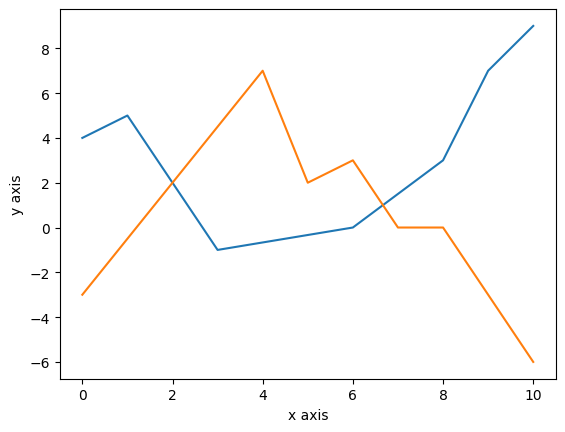

In [21]:
x1 = np.array([0, 1, 3, 6, 8, 9, 10])
y1 = np.array([4, 5, -1, 0, 3, 7, 9])

x2 = np.array([0, 4, 5, 6, 7, 8, 10])
y2 = np.array([-3, 7, 2, 3, 0, 0, -6])

plt.figure()
plt.plot(x1, y1)
plt.plot(x2, y2)

plt.xlabel("x axis")
plt.ylabel("y axis")

## Example: Linear regression

Let us generate some random data first.

In [200]:
np.random.seed(42)
x = np.random.normal(5, 3, 100)

a = 0.21
b = 1.34
y = a + b*x + np.random.normal(0, 3, x.shape)

\
Now pretend we know nothing about the origins of the data.

In [201]:
x.shape, y.shape

((100,), (100,))

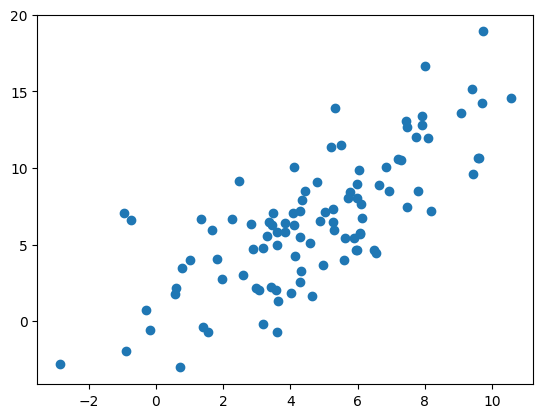

In [202]:
plt.figure()
plt.scatter(x, y)

Linear regression tries to estimate the linear relation between $x$ and $y$: $y_i = a + b x_i + \epsilon_i$ with Gaussian noise $\epsilon_i$.

The formula for simple linear regression is then
$$b_{est} = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$

$$a_{est} = \bar{y} - b_{est} \bar{x}$$

With $\bar{x}$ and $\bar{y}$ being the means of $x_i$ and $y_i$ respectively.


In [203]:
b_est = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x))**2)
a_est = np.mean(y) - b_est*np.mean(x)

a_est, b_est

(0.9485692909491164, 1.1967428397285569)

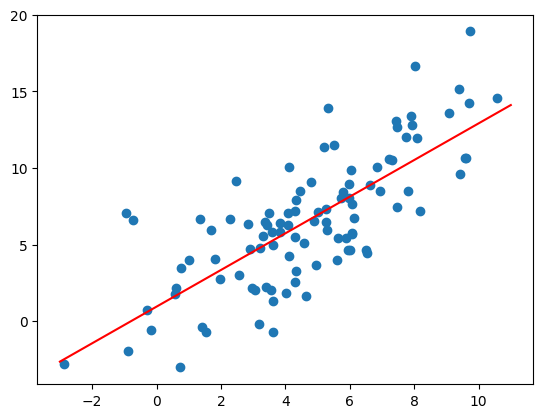

In [204]:
plt.figure()
plt.scatter(x, y)

xv = np.linspace(-3, 11, 2)
plt.plot(xv, a_est + b_est*xv, color='r')

## Example: Euler method for solving Ordinary Differential Equations

Lotka-Volterra equations model the predator-prey dynamics:

$$x' = a x - b x y$$ 
$$y' = d x y - c y$$

The population of prey $x$ increases proportionally to its size, and decreases proportionally to the frequency of encounters of predator and prey. The population of predators $y$ decreases proportionally to its size, and increases proportionally to the frequency of encounters with prey.

We solve the equations with explicit Euler method
$$
\vec{x}_{n+1} = \vec{x}_{n} + \Delta t f(\vec{x}_{n})
$$
where $\vec{x} = (x, y)$, $\Delta t$ is the time step, and $f(\vec{x})$ is the right hand side of the ODE.

In [75]:
T = 200.
dt = 0.2
nt = int(T/dt)
t = np.linspace(0, T, nt+1)

x = np.zeros((nt+1, 2))

# Initial conditions
x[0,:] = [100., 100.]

# Model constants
a = 0.1
b = 0.002
c = 0.2
d = 0.0025

for i in range(0, nt):
    x[i+1,0] = x[i,0] + dt*(a*x[i,0] - b*x[i,0]*x[i,1])
    x[i+1,1] = x[i,1] + dt*(d*x[i,0]*x[i,1] - c*x[i,1])

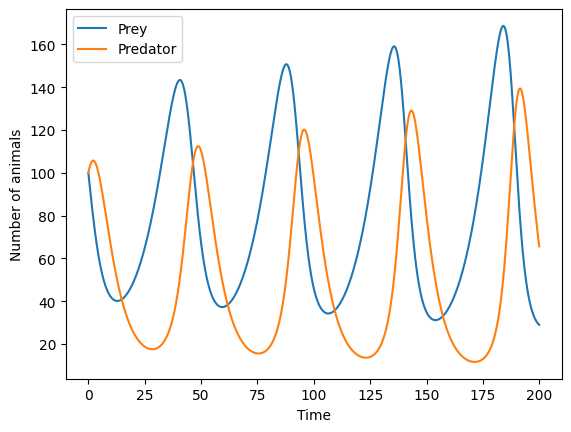

In [76]:
plt.figure()
plt.plot(t, x[:,0], label="Prey")
plt.plot(t, x[:,1], label="Predator")

plt.xlabel("Time")
plt.ylabel("Number of animals")
plt.legend()

Text(0, 0.5, 'Predator')

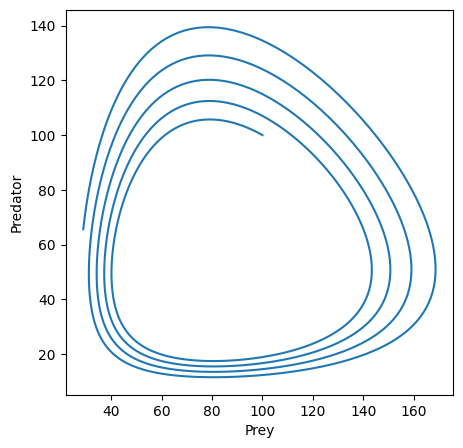

In [77]:
plt.figure(figsize=(5,5))
plt.plot(x[:,0], x[:,1])

plt.xlabel("Prey")
plt.ylabel("Predator")

### And now the same with scipy

In [78]:
import scipy.integrate

In [83]:
def fun(t, x):
    a = 0.1
    b = 0.002
    c = 0.2
    d = 0.0025
    
    return (a*x[0] - b*x[0]*x[1], d*x[0]*x[1] - c*x[1])

T = 200.
nt = 1000
t = np.linspace(0, T, nt+1)
res = scipy.integrate.solve_ivp(fun, (0,T), (100., 100.), t_eval=t, method='RK45')
xb = res.y.T

Text(0, 0.5, 'Predator')

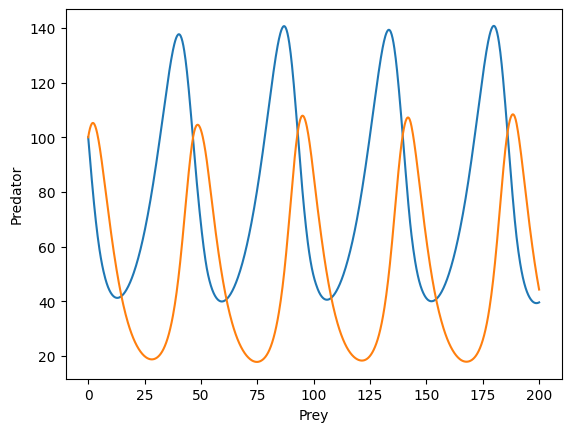

In [84]:
plt.figure()
plt.plot(t, xb[:,0])
plt.plot(t, xb[:,1])

plt.xlabel("Prey")
plt.ylabel("Predator")

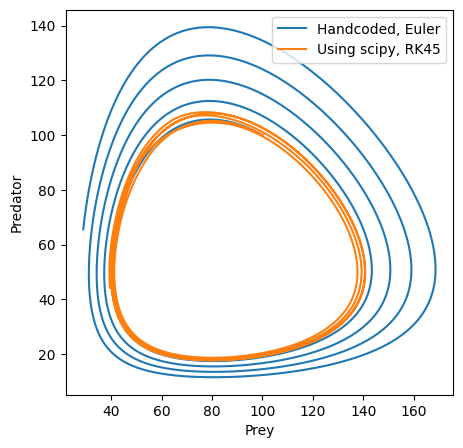

In [85]:
plt.figure(figsize=(5,5))
plt.plot(x[:,0], x[:,1], label="Handcoded, Euler")
plt.plot(xb[:,0], xb[:,1], label="Using scipy, RK45")

plt.xlabel("Prey")
plt.ylabel("Predator")
plt.legend(loc='upper right')